### Objective: To scrape the data of COVID-19 cases from their website and convert it into a format that in understandable by the computer

In [1]:
# import the required libraries
from bs4 import BeautifulSoup
import requests
from csv import writer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# url of the ncdc microsite
url = 'https://covid19.ncdc.gov.ng/'

In [3]:
# instantiate a variable
page = requests.get(url)
page

<Response [200]>

In [4]:
# Get the content of the html page
covid = BeautifulSoup(page.content, 'html.parser')

In [5]:
# Since we are interested in scraping the table, we need to find the section for table in the script
table = covid.find('table')

In [6]:
rows = table.find_all("tr")

In [7]:
covid=[]
type(covid)

list

In [8]:
for row in rows[1:]:
    cells = row.find_all(['td','th'])
    
    cells_text = [cell.get_text(strip = True) for cell in cells]
    print(cells_text)
    covid.append(cells_text)

['Lagos', '98,891', '60', '98,062', '769']
['FCT', '28,364', '14', '28,102', '248']
['Rivers', '16,576', '60', '16,362', '154']
['Kaduna', '11,222', '6', '11,128', '88']
['Plateau', '10,247', '2', '10,170', '75']
['Oyo', '10,211', '75', '9,934', '202']
['Edo', '7,694', '9', '7,364', '321']
['Ogun', '5,810', '11', '5,717', '82']
['Delta', '5,363', '82', '5,170', '111']
['Ondo', '5,173', '315', '4,749', '109']
['Kano', '4,969', '11', '4,831', '127']
['Akwa Ibom', '4,657', '27', '4,586', '44']
['Kwara', '4,579', '340', '4,175', '64']
['Gombe', '3,307', '83', '3,158', '66']
['Osun', '3,305', '38', '3,175', '92']
['Enugu', '2,952', '13', '2,910', '29']
['Anambra', '2,825', '46', '2,760', '19']
['Nasarawa', '2,719', '335', '2,345', '39']
['Imo', '2,550', '17', '2,475', '58']
['Katsina', '2,416', '4', '2,375', '37']
['Abia', '2,166', '12', '2,120', '34']
['Benue', '2,129', '340', '1,764', '25']
['Ebonyi', '2,064', '28', '2,004', '32']
['Ekiti', '1,982', '31', '1,923', '28']
['Bauchi', '1,939'

In [9]:
covid= pd.DataFrame(covid)
covid.head()

,0,1,2,3,4
0,Lagos,"98,891",60,"98,062",769
1,FCT,"28,364",14,"28,102",248
2,Rivers,"16,576",60,"16,362",154
3,Kaduna,"11,222",6,"11,128",88
4,Plateau,"10,247",2,"10,170",75


In [10]:
#renaming the columns
columns={0:'States Affected', 1:'No. of Cases (Lab Confirmed)',2:'No. of Cases (on admission)', 3:'No. Discharged', 4:'No. of Deaths'}
covid.rename(columns=columns, inplace=True)
covid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"98,891",60,"98,062",769
1,FCT,"28,364",14,"28,102",248
2,Rivers,"16,576",60,"16,362",154
3,Kaduna,"11,222",6,"11,128",88
4,Plateau,"10,247",2,"10,170",75


In [11]:
covid['No. of Cases (Lab Confirmed)']=covid['No. of Cases (Lab Confirmed)'].str.replace(',','')
covid['No. Discharged']=covid['No. Discharged'].str.replace(',','')
covid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,98891,60,98062,769
1,FCT,28364,14,28102,248
2,Rivers,16576,60,16362,154
3,Kaduna,11222,6,11128,88
4,Plateau,10247,2,10170,75


In [12]:
numeric=['No. of Cases (Lab Confirmed)','No. of Cases (on admission)','No. Discharged','No. of Deaths']
for column in numeric:
    covid[column]=covid[column].astype('int')
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     int32 
 4   No. of Deaths                 37 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 1016.0+ bytes


# Visualizations

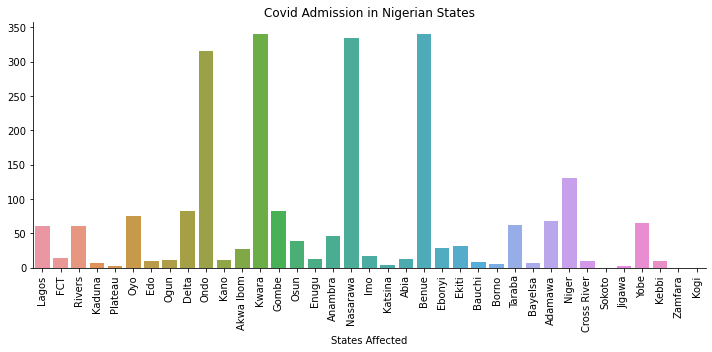

<Figure size 432x288 with 0 Axes>

In [36]:
fig.set_size_inches(15,10)

f=sns.catplot(x='States Affected', y='No. of Cases (on admission)',data=covid,  kind='bar')
f.fig.set_figwidth(10)
plt.xticks(rotation=90)
plt.title('Covid Admission in Nigerian States')
plt.ylabel('')
plt.tight_layout()
fig=plt.gcf()
plt.show()
plt.tight_layout()
fig.savefig('barchart of current admission.png',bbox_inches = "tight")


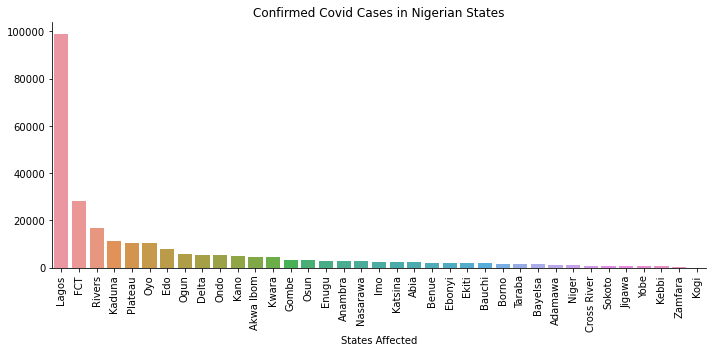

In [33]:
g=sns.catplot(x='States Affected', y='No. of Cases (Lab Confirmed)',data=covid,  kind='bar')
g.fig.set_figwidth(10)
plt.xticks(rotation=90)
plt.title('Confirmed Covid Cases in Nigerian States')
plt.ylabel('')
plt.tight_layout()
fig=plt.gcf()
plt.show()
fig.savefig('barchart of confirmed cases.png',bbox_inches = "tight")

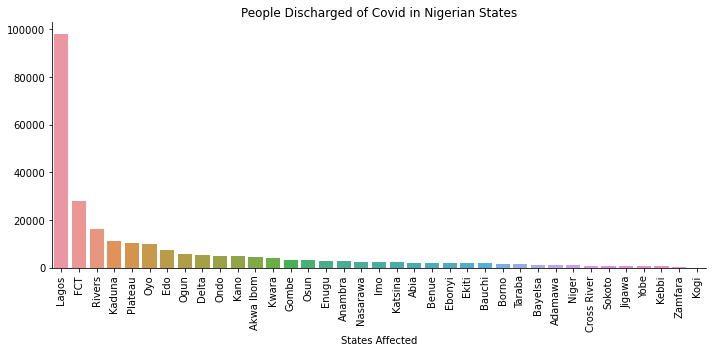

In [34]:

f=sns.catplot(x='States Affected', y='No. Discharged',data=covid,  kind='bar')
f.fig.set_figwidth(10)
plt.xticks(rotation=90)
plt.title('People Discharged of Covid in Nigerian States')
plt.ylabel('')
plt.tight_layout()
fig=plt.gcf()
plt.show()
fig.savefig('barchart of discharged.png',bbox_inches ="tight")


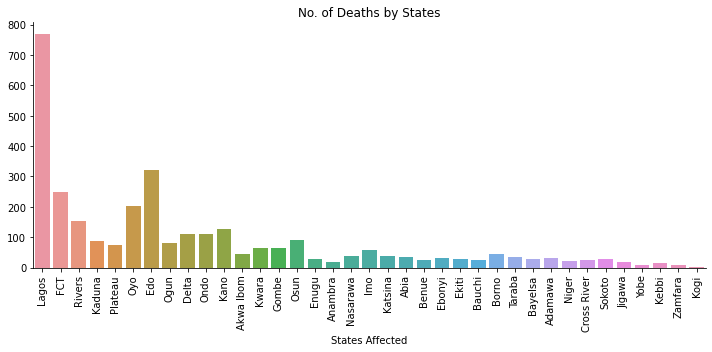

In [35]:
f=sns.catplot(x='States Affected', y='No. of Deaths',data=covid,  kind='bar')
f.fig.set_figwidth(10)
plt.xticks(rotation=90)
plt.title('No. of Deaths by States')
plt.ylabel('')
plt.tight_layout()
fig=plt.gcf()
plt.show()
fig.savefig('barchart of death.png',bbox_inches = "tight")

In [37]:
covid['percent_death']=covid['No. of Deaths']/covid['No. of Cases (Lab Confirmed)']*100

In [38]:
covid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,percent_death
0,Lagos,98891,60,98062,769,0.777624
1,FCT,28364,14,28102,248,0.874348
2,Rivers,16576,60,16362,154,0.929054
3,Kaduna,11222,6,11128,88,0.784174
4,Plateau,10247,2,10170,75,0.731922


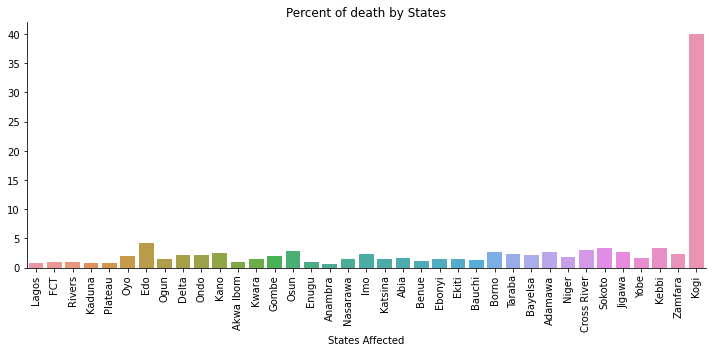

In [39]:
f=sns.catplot(x='States Affected', y='percent_death',data=covid,  kind='bar')
f.fig.set_figwidth(10)
plt.xticks(rotation=90)
plt.title('Percent of death by States')
plt.ylabel('')
plt.tight_layout()
fig=plt.gcf()
plt.show()
fig.savefig('barchart of percent_death.png',bbox_inches = "tight")